price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition               float64
grade                   float64
sqft_above              float64
sqft_basement           float64
yr_built                float64
yr_renovated            float64
zipcode                 float64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
dtype: object
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372646      2.115798   2079.899736  1.510697e+04   
std    3.671272e+05      0.926423      0.768823    918.440897  4.142051e+04   
min    7.500000e+04      1.000

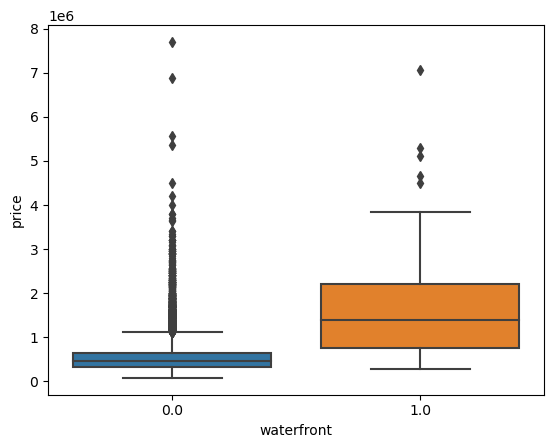

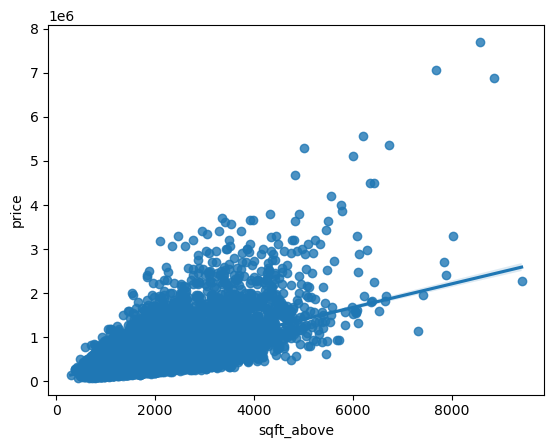

0.6614140496107886
0.7099071873738336
0.6614094023121118
0.700063609492812


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_path)

df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df['date'] = pd.to_datetime(df['date'])
imputer = SimpleImputer(strategy='median')
df_numeric = df.select_dtypes(include=[np.number])
df_non_numeric = df.select_dtypes(exclude=[np.number])

df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df = pd.concat([df_numeric, df_non_numeric], axis=1)

print(df.dtypes)

print(df.describe())

floors_count = df['floors'].value_counts().to_frame()
print(floors_count)

sns.boxplot(x='waterfront', y='price', data=df)
plt.show()

sns.regplot(x='sqft_above', y='price', data=df)
plt.show()

features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print(ridge.score(X_test, y_test))

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge.fit(X_train_poly, y_train)
print(ridge.score(X_test_poly, y_test))


`Author`:
``Mete Avcı``